# 神经网络常用激活函数
### （Sigmod, tanh, ReLU）

# 1. sigmod
#### 表达式
$$
\begin{align}
g\left( z\right) & =\dfrac {1}{1+e^{-z}}
\end{align}
$$
#### 求导：
$$
\begin{align}
g\left( z\right)^{'} & =\left( \dfrac {1}{1+e^{-z}}\right)^{'} \\
& = \dfrac {1^{'}\left( 1+e^{-z}\right) -1\left( 1+e^{-z}\right)^{'} }{\left( 1+e^{-z}\right) ^{2}} \\
& = \dfrac {-1\left( -e^{-z}\right) }{\left( 1+e^{-z}\right) ^{2}} \\
& = \dfrac {e^{-z} }{\left( 1+e^{-z}\right) ^{2}} \\
& = \dfrac {1}{1+e^{-z}}\dfrac {e^{-z}}{1+e^{-z}} \\
& = \dfrac {1}{1+e^{-z}}\dfrac {1+e^{-z}-1}{1+e^{-z}} \\
& = \dfrac {1}{1+e^{-z}}\left( 1-\dfrac {1}{1+e^{-z}}\right) \\
& = g(z)(1-g(z))
\end{align}
$$
#### 作用：
将输出$z$激活映射到$(0,1)$之间

#### 缺点：

1. 当$z$非常大或非常小时，sigmod的导数$g(z)^{'}$将接近0，会导致向下层传播或反向传播更新权重$W$时，使$W$需要修改的值（$W$的梯度）非常小（接近0），使梯度更新非常缓慢，即梯度消失
2. 函数的输出不是以0为均值，均值是0.5，不便于下层的计算

#### 使用：

1. 二分类算法（如逻辑回归）的最后（比如让逻辑回归输出值变成$(0, 1)$的值）
2. 神经网络的最后一层，不用在隐藏层中，作为输出层做二分类作用



# 2. tanh
#### 表达式
$$
g(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}}
$$
#### 求导
$$
\begin{align}
g(z)^{'} & = \left(\frac{e^z-e^{-z}}{e^z+e^{-z}} \right)^{'} \\
& = …… \\
& = \frac{4}{(e^z+e^{-z})^2} \\
& = …… \\
& = 1-g(z)^2
\end{align}
$$
#### 作用：
将输出$z$激活映射到$(-1,1)$之间

#### 缺点：

1. 同sigmod，易梯度消失

#### 优点：

1. 均值为0，比sigmod好

#### 使用：

1. 神经网络最后一层，偶尔也能看到用在隐藏层



# 3. ReLU
#### 表达式
$$
\begin{align}
g(z) & = \begin{cases}
	z, & if\ z>0\\
	0, & if\ z<0
\end{cases}
\end{align}
$$
#### 求导
$$
\begin{align}
g(z)^{'} & = \begin{cases}
	1, & if\ z>0\\
	0, & if\ z<0
\end{cases}
\end{align}
$$
#### 缺点：

1. 当输入为负时，梯度为0，梯度消失

#### 优点：

1. 在输入为正数时，不存在梯度消失问题
2. 计算速度快，计算公式是线性关系，sigmod和tanh要计算指数，计算慢

# TensorFlow MNIST

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [79]:
# 读取数据
# mnist = fetch_mldata('MNIST original')
# X, y = mnist["data"], mnist["target"]
# print(X.shape, Y.shape)
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.InteractiveSession()
# 构建cnn网络结构
# 自定义卷积函数（后面卷积时就不用写太多）
def conv2d(x,w):
    return tf.nn.conv2d(x, w, strides=[1,1,1,1], padding='SAME') 
# 自定义池化函数 
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# 设置占位符，尺寸为样本输入和输出的尺寸
x = tf.placeholder(tf.float32,[None,784])
y_ = tf.placeholder(tf.float32,[None,10])
x_img = tf.reshape(x,[-1,28,28,1])

# 设置第一个卷积层和池化层
w_conv1 = tf.Variable(tf.truncated_normal([3,3,1,32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))
h_conv1 = tf.nn.relu(conv2d(x_img, w_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# 设置第二个卷积层和池化层
w_conv2 = tf.Variable(tf.truncated_normal([3,3,32,50], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[50]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 设置第一个全连接层
w_fc1 = tf.Variable(tf.truncated_normal([7*7*50,1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1,7*7*50])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,w_fc1) + b_fc1)

# dropout（随机权重失活）
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 设置第二个全连接层
w_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_out =tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

# 建立loss function，为交叉熵
loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_out), reduction_indices=[1]))
# 配置Adam优化器，学习速率为1e-4
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

# 建立正确率计算表达式
correct_prediction = tf.equal(tf.argmax(y_out, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 开始喂数据，训练 
# with tf.Session() as sess:
# 初始化
sess.run(tf.global_variables_initializer())
# 训练
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i % 1000 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={x:batch[0], y_:batch[1], keep_prob:1})
        print("step %d,train_accuracy= %g" % (i, train_accuracy))
    sess.run(train_step, feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})
# 算准确率
print("test_accuracy= %g" % sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob:1}))
# print('Pred:', y_out.eval(feed_dict={x:mnist.test.images[501].reshape(1,-1), keep_prob:1}))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
step 0,train_accuracy= 0.12
step 1000,train_accuracy= 0.94
step 2000,train_accuracy= 1
step 3000,train_accuracy= 0.98
step 4000,train_accuracy= 0.98
step 5000,train_accuracy= 1
step 6000,train_accuracy= 1
step 7000,train_accuracy= 1
step 8000,train_accuracy= 0.98
step 9000,train_accuracy= 1
step 10000,train_accuracy= 1
step 11000,train_accuracy= 1
step 12000,train_accuracy= 1
step 13000,train_accuracy= 0.98
step 14000,train_accuracy= 1
step 15000,train_accuracy= 1
step 16000,train_accuracy= 1
step 17000,train_accuracy= 1
step 18000,train_accuracy= 1
step 19000,train_accuracy= 1
test_accuracy= 0.9921


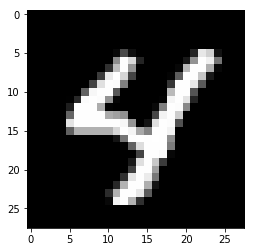

Sample:  4
mnist.test.labels:
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Pred:
 [[1.54082378e-12 6.72457035e-10 1.08526825e-11 2.40996784e-12
  9.99999881e-01 2.44344683e-11 1.22493704e-13 1.29587596e-09
  1.51193504e-07 9.50989357e-11]]


In [82]:
def showtest(i, sess):
    %matplotlib inline

    sample = mnist.test.images[i].reshape(28,28)
    plt.imshow(sample, cmap='gray')
    plt.show()
    
    print('Sample: ', np.argmax(mnist.test.labels[i]))
    print('mnist.test.labels:\n', mnist.test.labels[i])
    print('Pred:\n', sess.run(y_out, feed_dict={x:mnist.test.images[i].reshape(1,-1), keep_prob:1}))

showtest(6205, sess)